In [ ]:
$import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats

In [ ]:
#load the dataset
data = pd.read_excel('/content/Satellite_cleaned.xlsx')
data.head()

,Unnamed: 0,Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.)
0,0,Earth Observation,LEO,Non-Polar Inclined,0,566,576,0.001510,22.0,22.0,22.0,0.5
1,2,Technology Development,LEO,Sun-Synchronous,0,497,517,0.001450,4.5,4.5,4.5,2.0
2,35,Technology Development,LEO,Sun-Synchronous,0,614,700,0.006119,5.0,5.0,5.0,3.0
3,36,Technology Development,LEO,Sun-Synchronous,0,614,700,0.006119,5.0,5.0,5.0,3.0
4,43,Earth Observation,LEO,Sun-Synchronous,0,544,552,0.000578,215.0,215.0,215.0,2.0


In [ ]:
# Calculate z-scores for the 'Expected Lifetime(yrs.)' column
z_scores = np.abs(stats.zscore(data['Expected Lifetime (yrs.)']))

# Set a threshold for outlier detection
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Display the outliers
outliers = data.iloc[outlier_indices]
print("Outliers:")
print(outliers)

Outliers:
      Unnamed: 0            Purpose Class of Orbit       Type of Orbit  \
285          690  Earth Observation            LEO     Sun-Synchronous   
297          831         Navigation     Elliptical  Non-Polar Inclined   
298          832         Navigation            MEO  Non-Polar Inclined   
299          833         Navigation            MEO  Non-Polar Inclined   
300          834         Navigation            MEO  Non-Polar Inclined   
...          ...                ...            ...                 ...   
1384        2875     Communications     Elliptical             Molniya   
1385        2876     Communications     Elliptical             Molniya   
1386        2877     Communications     Elliptical             Molniya   
4884        7157      Space Science            LEO  Non-Polar Inclined   
4902        7342  Earth Observation            LEO     Sun-Synchronous   

      Longitude of GEO (degrees)  Perigee (km)  Apogee (km)  Eccentricity  \
285                     

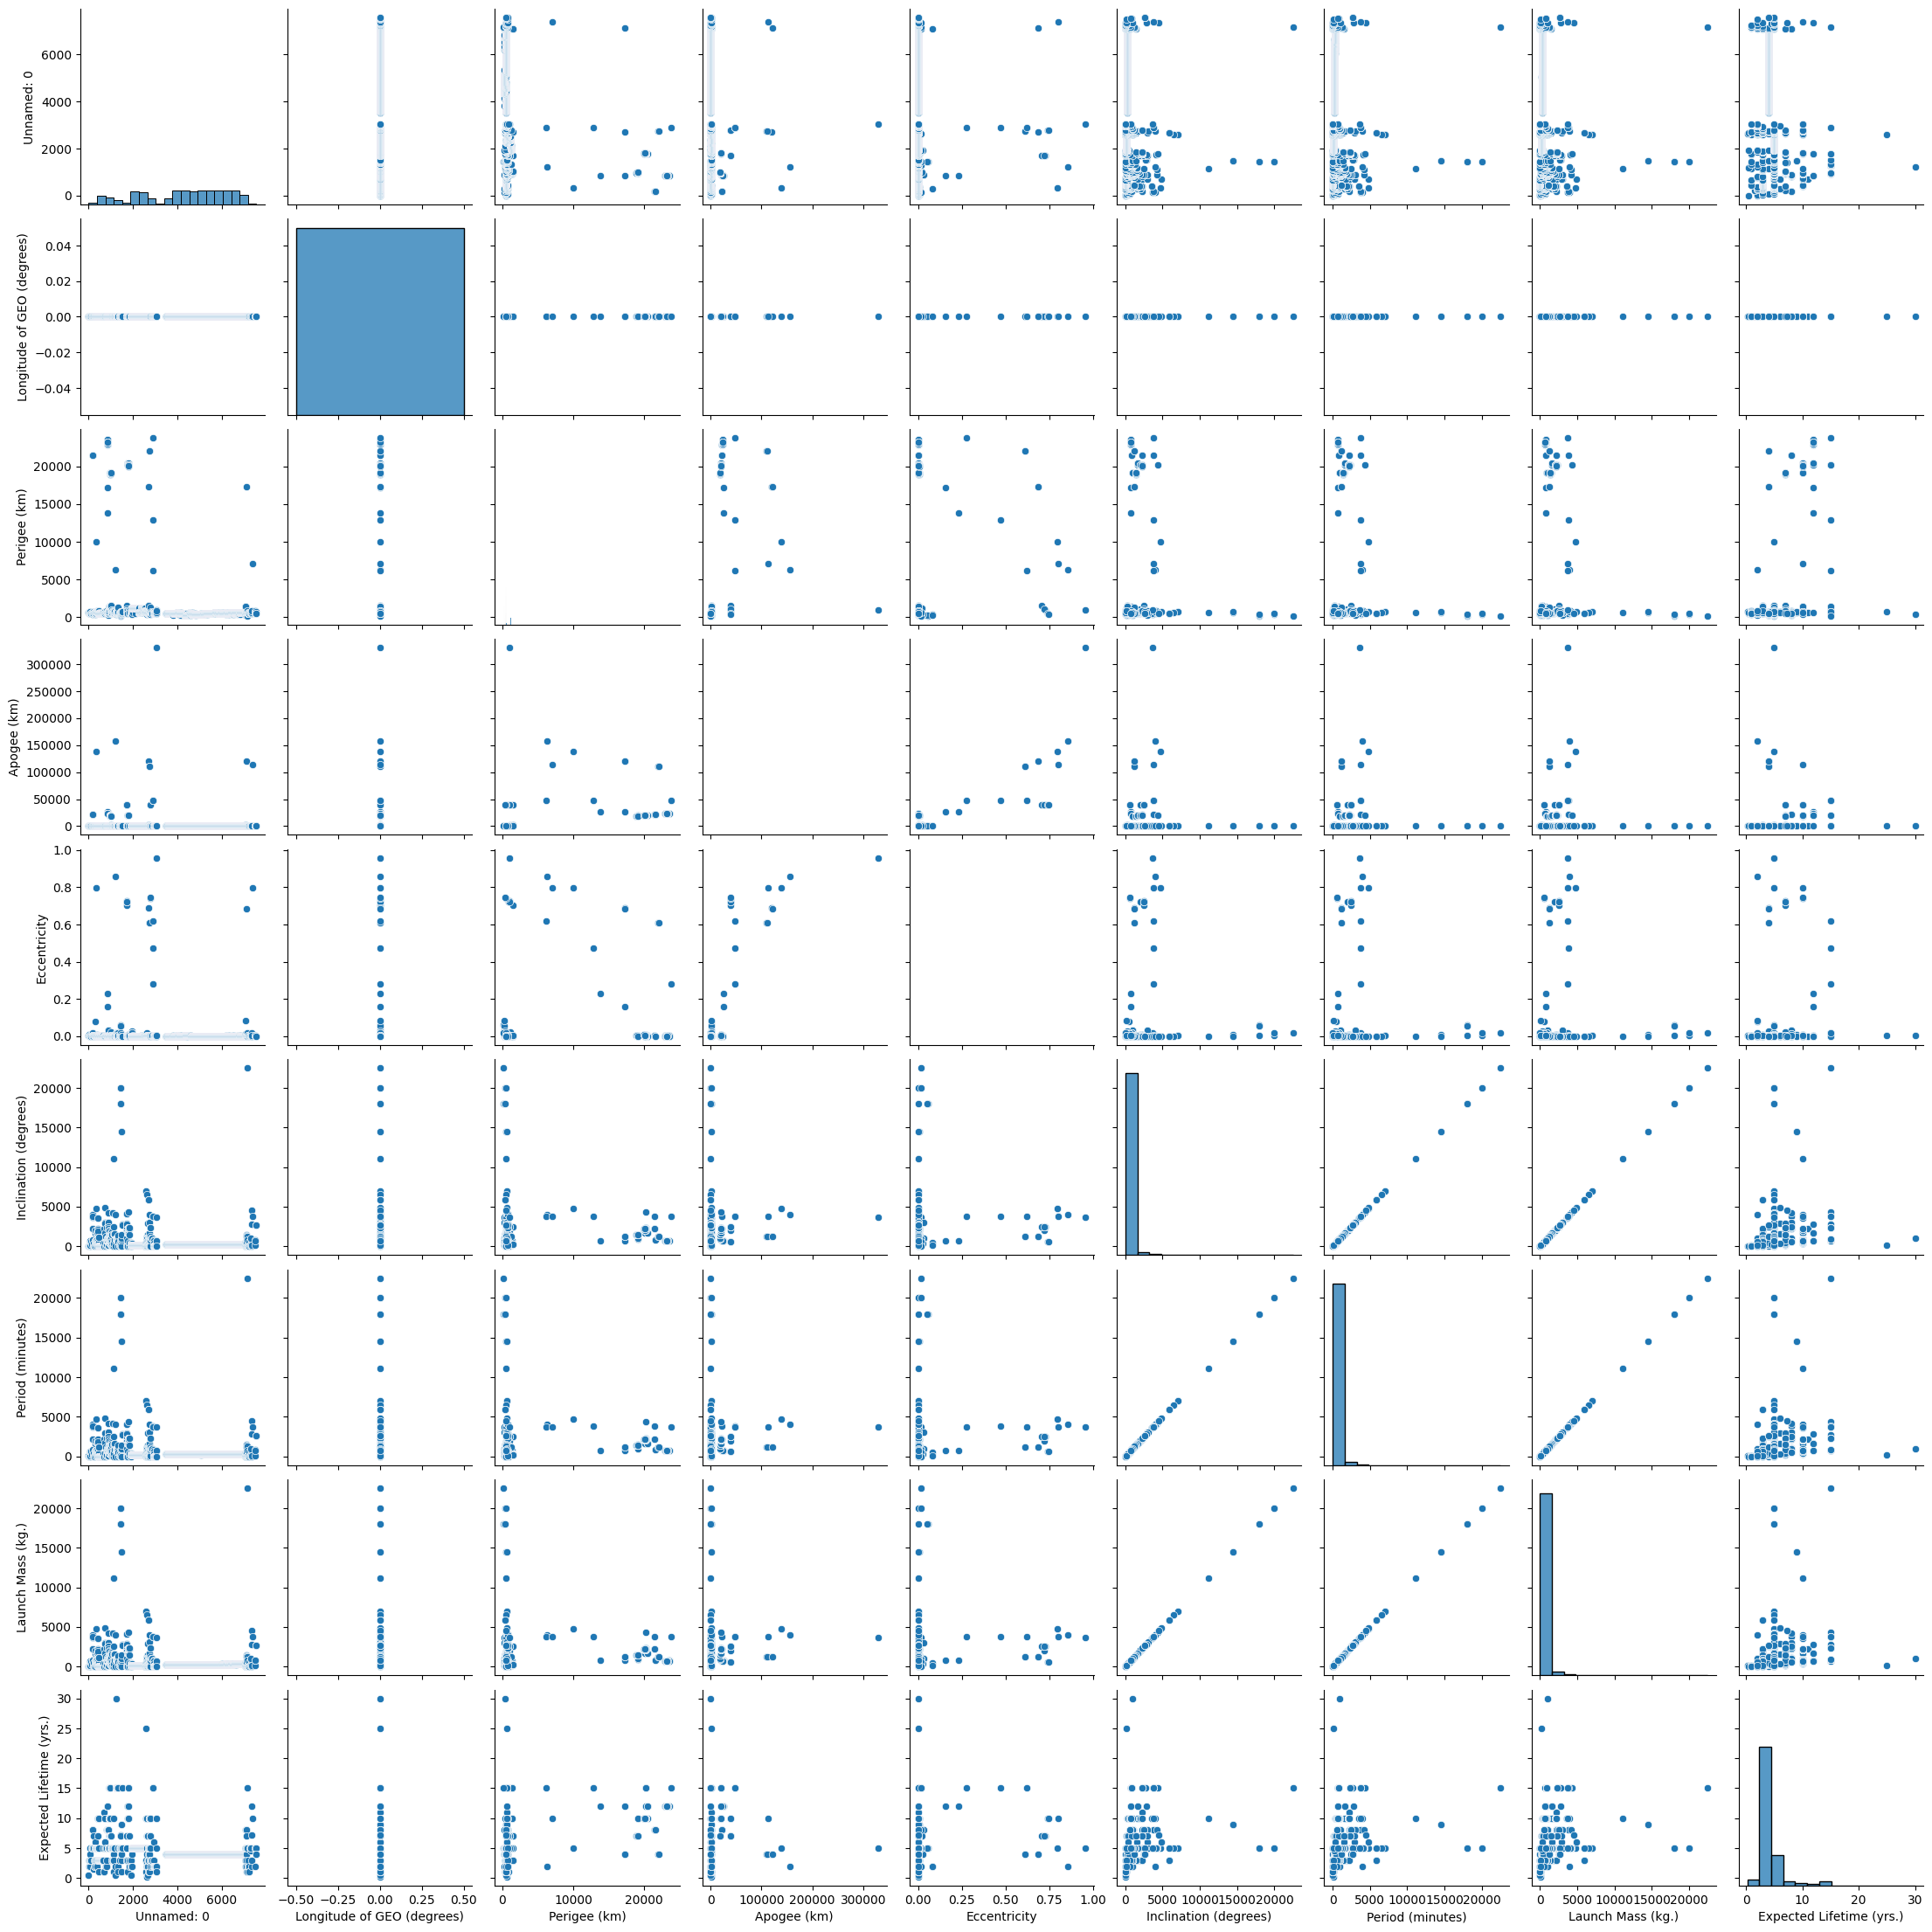

In [ ]:
# Exploratory Data Analysis
sns.pairplot(data)
plt.show()

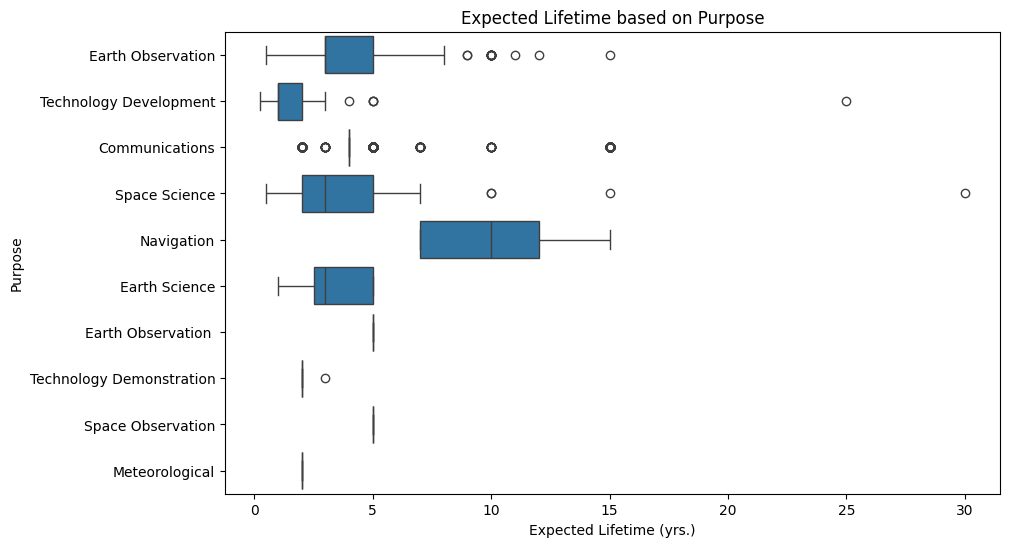

In [ ]:
# EDA - Expected Lifetime based on Purpose
plt.figure(figsize=(10, 6))
sns.boxplot(x='Expected Lifetime (yrs.)', y='Purpose', data=data)
plt.title('Expected Lifetime based on Purpose')
plt.show()

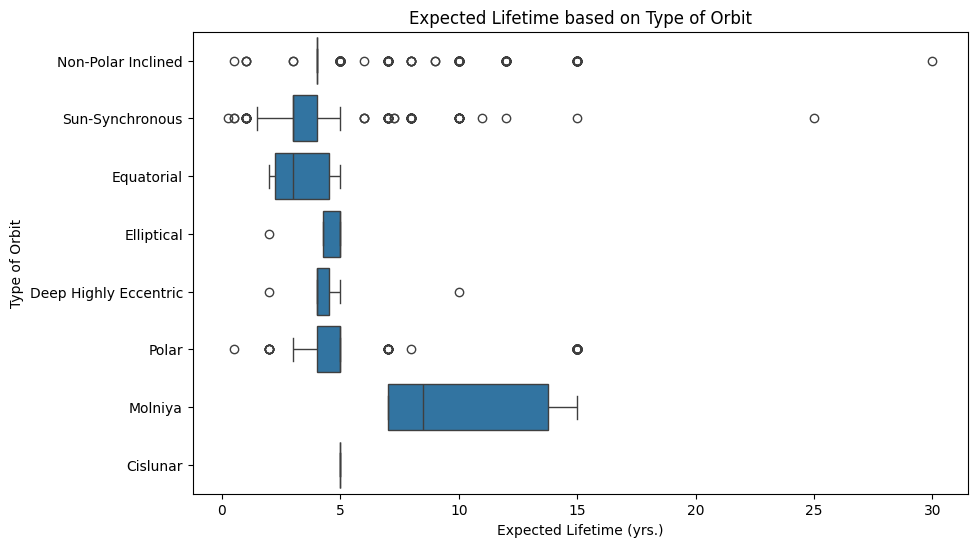

In [ ]:
# EDA - Expected Lifetime based on Type of Orbit
plt.figure(figsize=(10, 6))
sns.boxplot(x='Expected Lifetime (yrs.)', y='Type of Orbit', data=data)
plt.title('Expected Lifetime based on Type of Orbit')
plt.show()

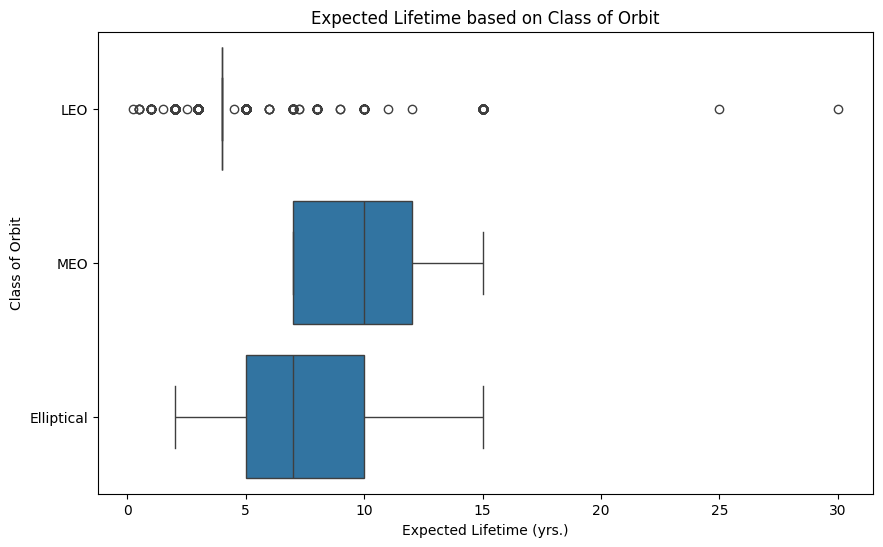

In [ ]:
# EDA - Expected Lifetime based on Class of Orbit
plt.figure(figsize=(10, 6))
sns.boxplot(x='Expected Lifetime (yrs.)', y='Class of Orbit', data=data)
plt.title('Expected Lifetime based on Class of Orbit')
plt.show()

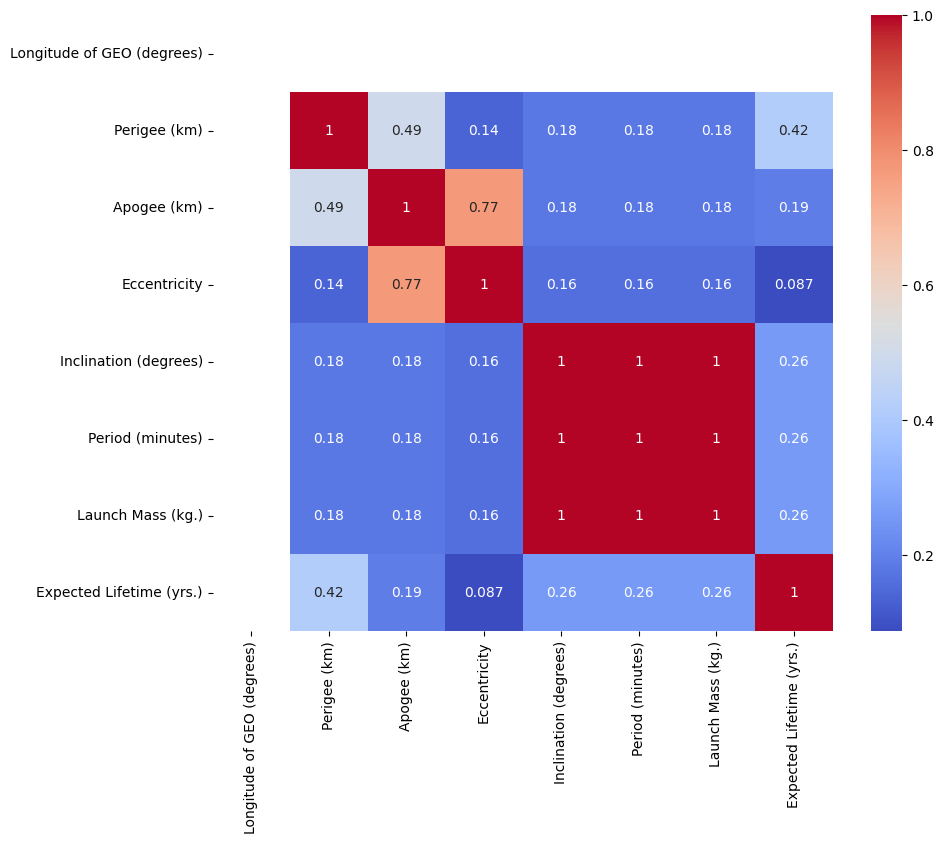

In [ ]:
# Drop the first unnamed column
data = data.drop(data.columns[0], axis=1)

# Drop non-numeric columns for correlation heatmap
numeric_columns = data.select_dtypes(include=np.number).columns
data_numeric = data[numeric_columns]

# Correlation heatmap
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()